## Exploratory Data Analysis

#### Dataset 1: Crimes

The United States crimes dataset from kaggle contained 4 csv files, each containing information about crimes for cities. They csv files are separated by population ranges.

* 'crime_40 _60.csv': dataset for population ranging from 40,000 to 60,000.

* 'crime_60 _100.csv': dataset for population ranging from 60,000 to 100,000.

* 'crime_100 _250.csv': dataset for population ranging from 100,000 to 250,000.

* 'crime_250 _plus.csv': dataset for population greater than 250,000.

We're interested in all the cities available in the dataset so we will combine the csvs into one dataframe.

First, inspecting each csv as a dataframe separately, checking columns and values.

In [155]:
import pandas as pd

In [156]:

pd.read_csv('crime/crime_250_plus.csv').head()

,states,cities,population,total_crime,murder,rape,robbery,agrv_assault,tot_violent_crime,burglary,larceny,vehicle_theft,tot_prop_crim,arson
0,Alabama,Mobile3,"248,431",6217.02,20.13,58.16,177.11,485.85,740.25,"1,216.84","3,730.21",506.78,"5,453.83",22.94
1,Alaska,Anchorage,"296,188",6640.04,9.12,132.01,262.67,799.49,"1,203.29",748.17,"3,619.66","1,047.98","5,415.82",20.93
2,Arizona,Chandler,"249,355",2589.08,2.01,52.13,56.95,148.38,259.47,314.41,"1,866.01",149.18,"2,329.61",NaN
3,Arizona,Gilbert,"242,090",1483.75,2.07,16.11,21.07,46.26,85.51,192.49,"1,137.59",55.76,"1,385.85",12.39
4,Arizona,Glendale,"249,273",5037.85,4.81,38.91,192.96,251.53,488.22,637.45,"3,426.36",466.56,"4,530.37",19.26


In [157]:
pd.read_csv('crime/crime_100_250.csv').head()


,states,cities,population,violent_crime,murder,rape,robbery,agrv_assault,prop_crime,burglary,larceny,vehicle_theft
0,Texas,Abilene,"119,886",393.7,2.5,31.7,105.9,253.6,"3,664.3",865,"2,656.7",142.6
1,Ohio,Akron,"198,390",886.6,12.1,84.2,290.8,499.5,"5,057.7","1,728.4","2,965.9",363.4
2,Virginia,Alexandria,"145,892",166.6,-,6.2,94.6,65.8,"2,049.5",192.6,"1,633.4",223.5
3,Pennsylvania,Allentown,"119,334",547.2,12.6,45.3,313.4,176,"3,857.2","1,045.8","2,503.1",308.4
4,Texas,Amarillo,"196,576",650.1,5.1,56.0,141.4,447.7,"4,527.5","1,061.7","3,145.9",320


In [158]:
pd.read_csv('crime/crime_40_60.csv').head()

,states,cities,population,violent_crime,murder,rape,robbery,agrv_assault,prop_crime,burglary,larceny,vehicle_theft
0,Pennsylvania,"Abington Township, Montgomery County","55,731",197.4,1.8,14.4,70.0,111.2,1979.1,296.1,1650.8,32.3
1,Oregon,Albany,"51,084",86.1,0.0,19.6,45.0,21.5,3092.9,438.5,2470.4,184.0
2,Louisiana,Alexandria,"48,449",1682.2,18.6,28.9,293.1,1341.6,7492.4,2010.4,5102.3,379.8
3,California,Aliso Viejo,"48,999",87.8,0.0,0.0,12.2,75.5,847.0,208.2,612.3,26.5
4,Florida,Altamonte Springs,"42,296",335.7,2.4,21.3,82.8,229.3,3057.0,427.9,2463.6,165.5


In [159]:
pd.read_csv('crime/crime_60_100.csv').head()

,states,cities,population,violent_crime,murder,rape,robbery,agrv_assault,prop_crime,burglary,larceny,vehicle_theft
0,California,Alameda,"75,467",212.0,1.3,11.91,106.0,92.8,"2,507.1",392.2,"1,723.9",390.9
1,Georgia,Albany,"78,512","1,035.5",5.1,34.4,285.3,710.7,"6,369.7","1,793.4","4,291.1",285.3
2,New York,Albany,"98,187",816.8,4.1,43.8,253.6,515.3,"4,420.1",903.4,"3,359.9",156.8
3,California,Alhambra,"84,469",176.4,-,2.4,78.1,95.9,"2,271.8",384.8,"1,585.2",301.9
4,Texas,Allen,"88,783",61.9,-,12.4,14.6,34.9,"1,612.9",242.2,"1,321.2",49.6


After inspecting the csvs, combine all of them into a dataframe called crime.

In [163]:
import pandas as pd
import os

directories = ['crime', 'income']

dfs = []
filenames = os.listdir('crime')
filenames = [f for f in filenames if os.path.isfile(os.path.join('crime', f))]

for filename in filenames:
    df = pd.read_csv(f'crime/{filename}')
    dfs.append(df)
    
crime = pd.concat(dfs, ignore_index=True)

In [164]:
# checking the number of rows and columns
crime.shape

(975, 16)

Other EDA tasks such as inspecting individual columns and why there are duplicate values. There are multiple cities with the same name but from different states which is why there's duplicates in cities.

In [165]:
crime['cities'].nunique()

889

In [166]:
crime['cities'].value_counts() 

cities
Springfield        5
Lakewood           4
Albany             3
Columbus           3
Newark             3
                  ..
Davis              1
Daytona Beach      1
Dearborn           1
Deerfield Beach    1
Yucaipa            1
Name: count, Length: 889, dtype: int64

clean up cities column by remvoving uneccesary characters and values from the city name

In [167]:
crime['cities'] = crime['cities'].str.replace(r'\d+', '', regex=True)

In [168]:
crime['violent_crime'] = crime['violent_crime'].fillna(crime['tot_violent_crime'])
crime['prop_crime'] = crime['prop_crime'].fillna(crime['tot_prop_crim'])

Dropping columns because they're not present across all datasets. The crimes csv file for cities with population of 250,000+ contained 4 extra columns that are not in the other 3 datasets so there's no information on these columns for cities under 250,000 population and they appear as null values in the dataframe, so we can drop those columns.

In [169]:
crime.drop(columns = ['total_crime','arson', 'tot_prop_crim', 'tot_violent_crime'], inplace = True)

In [170]:
crime.dtypes

states            object
cities            object
population        object
murder            object
rape              object
robbery          float64
agrv_assault      object
burglary          object
larceny           object
vehicle_theft     object
violent_crime     object
prop_crime        object
dtype: object

In [171]:
crime.replace('-', '0', inplace=True)

In [172]:

    
crime['population'] = crime['population'].str.replace(',', '').astype(int)
crime['murder'] = crime['murder'].astype(float)
crime['rape'] = crime['rape'].astype(float)
#crime['agrv_assault'] = crime['agrv_assault'].astype(float)
#crime['burglary'] = crime['burglary'].astype(float)
#crime['larceny'] = crime['larceny'].str.replace(',', '').astype(float)
#crime['vehicle_theft'] = crime['vehicle_theft'].str.replace(',', '').astype(float)
#crime['violent_crime'] = crime['violent_crime'].str.replace(',', '').astype(float)
#crime['prop_crime'] = crime['prop_crime'].str.replace(',', '').astype(float)


In [173]:
crime.head()

,states,cities,population,murder,rape,robbery,agrv_assault,burglary,larceny,vehicle_theft,violent_crime,prop_crime
0,Alabama,Mobile,248431,20.13,58.16,177.11,485.85,"1,216.84","3,730.21",506.78,740.25,"5,453.83"
1,Alaska,Anchorage,296188,9.12,132.01,262.67,799.49,748.17,"3,619.66","1,047.98","1,203.29","5,415.82"
2,Arizona,Chandler,249355,2.01,52.13,56.95,148.38,314.41,"1,866.01",149.18,259.47,"2,329.61"
3,Arizona,Gilbert,242090,2.07,16.11,21.07,46.26,192.49,"1,137.59",55.76,85.51,"1,385.85"
4,Arizona,Glendale,249273,4.81,38.91,192.96,251.53,637.45,"3,426.36",466.56,488.22,"4,530.37"


In [174]:
crime.to_csv('cleaned_crime.csv', index=False)

#### Dataset 2: Median Income

In [175]:
median_income = pd.read_csv('med_income_23/ACSST1Y2023.S1902-Data.csv')

In [176]:
median_income = median_income[['NAME','S1902_C01_001E']]
median_income.drop(index=0, inplace = True)
median_income.rename(columns={'NAME': 'City', 'S1902_C01_001E': 'Median Income'}, inplace=True)

In [177]:
# Keeping data only for cities in the United States
us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 
    'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 
    'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 
    'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 
    'West Virginia', 'Wisconsin', 'Wyoming'
]

# Filter the DataFrame to keep only U.S. cities

median_income['City'] = median_income['City'].str.replace(r'\s*(city|town|CDP|municipality)\s*', '', regex=True).str.strip()


#df.drop(columns=['Location'], inplace=True)

median_income['State'] = median_income['City'].str.split(', ').str[1]  # Extract the state
median_income['City'] = median_income['City'].apply(lambda x: x.split(',')[0].strip())
df_us = median_income[median_income['State'].isin(us_states)]  # Keep only rows where the state is in the list

#df_us.drop(columns=['State'], inplace=True)

df_us

,City,Median Income,State
1,Auburn,32859,Alabama
2,Birmingham,91740,Alabama
3,Dothan,30920,Alabama
4,Hoover,38178,Alabama
5,Huntsville,99557,Alabama
...,...,...,...
639,Milwaukee,227173,Wisconsin
640,Oshkosh,28147,Wisconsin
641,Racine,31700,Wisconsin
642,Waukesha,30668,Wisconsin


In [178]:
df_us.to_csv('cleaned_income.csv', index=False)

#### Merging the Two Datasets

Now that the data is cleaned, we can merge it together so it can be more convenient for statistical analysis.

In [179]:
merged_data = pd.merge(df_us, crime, left_on=['City', 'State'], right_on=['cities','states'], how='inner')

In [180]:
merged_data.head()

,City,Median Income,State,states,cities,population,murder,rape,robbery,agrv_assault,burglary,larceny,vehicle_theft,violent_crime,prop_crime
0,Auburn,32859,Alabama,Alabama,Auburn,54785,5.5,23.7,45.6,166.1,763.0,2646.7,93.1,240.9,3502.8
1,Birmingham,91740,Alabama,Alabama,Birmingham,213266,31.4,71.3,460.9,954.2,"2,205.7","4,239.8",488.6,"1,517.8","6,934.1"
2,Dothan,30920,Alabama,Alabama,Dothan,66275,7.5,45.3,150.9,277.6,"1,336.9","2,894.0",196.2,481.3,"4,427.0"
3,Hoover,38178,Alabama,Alabama,Hoover,82332,2.4,15.8,55.9,30.4,477.3,"2,067.2",103.2,104.5,"2,647.8"
4,Huntsville,99557,Alabama,Alabama,Huntsville,183691,7.6,39.2,248.2,628.2,"1,178.6","3,476.5",386.5,923.3,"5,041.6"


In [181]:
# Drop redundant columns
merged_data = merged_data.drop(['states', 'cities'], axis = 1)

In [182]:
merged_data.isnull().sum()

City              0
Median Income     0
State             0
population        0
murder            0
rape             10
robbery           0
agrv_assault      0
burglary          1
larceny           0
vehicle_theft     0
violent_crime    10
prop_crime        1
dtype: int64

In [183]:
merged_data.fillna(0, inplace=True)

In [184]:
merged_data.isnull().sum()

City             0
Median Income    0
State            0
population       0
murder           0
rape             0
robbery          0
agrv_assault     0
burglary         0
larceny          0
vehicle_theft    0
violent_crime    0
prop_crime       0
dtype: int64

In [185]:
merged_data.head()

,City,Median Income,State,population,murder,rape,robbery,agrv_assault,burglary,larceny,vehicle_theft,violent_crime,prop_crime
0,Auburn,32859,Alabama,54785,5.5,23.7,45.6,166.1,763.0,2646.7,93.1,240.9,3502.8
1,Birmingham,91740,Alabama,213266,31.4,71.3,460.9,954.2,"2,205.7","4,239.8",488.6,"1,517.8","6,934.1"
2,Dothan,30920,Alabama,66275,7.5,45.3,150.9,277.6,"1,336.9","2,894.0",196.2,481.3,"4,427.0"
3,Hoover,38178,Alabama,82332,2.4,15.8,55.9,30.4,477.3,"2,067.2",103.2,104.5,"2,647.8"
4,Huntsville,99557,Alabama,183691,7.6,39.2,248.2,628.2,"1,178.6","3,476.5",386.5,923.3,"5,041.6"


In [186]:
merged_data.to_csv('income_and_crimes.csv', index=False)

In [187]:
# Select only numeric columns before applying median
numeric_cols = ["Median Income", "agrv_assault", "burglary", "larceny",
                "vehicle_theft", "violent_crime", "prop_crime"]

# Remove commas and convert columns to numeric
for col in numeric_cols:
    merged_data[col] = merged_data[col].replace({",": ""}, regex=True)  # Remove commas
    merged_data[col] = pd.to_numeric(merged_data[col], errors="coerce")  # Convert to numeric

# Handle missing values only for numeric columns
merged_data[numeric_cols] = merged_data[numeric_cols].fillna(merged_data[numeric_cols].median())

# Verify if all columns are now numeric
print(merged_data.dtypes)

City              object
Median Income    float64
State             object
population         int64
murder           float64
rape             float64
robbery          float64
agrv_assault     float64
burglary         float64
larceny          float64
vehicle_theft    float64
violent_crime    float64
prop_crime       float64
dtype: object


In [188]:
merged_data

,City,Median Income,State,population,murder,rape,robbery,agrv_assault,burglary,larceny,vehicle_theft,violent_crime,prop_crime
0,Auburn,32859.0,Alabama,54785,5.5,23.7,45.6,166.1,763.0,2646.7,93.1,240.9,3502.8
1,Birmingham,91740.0,Alabama,213266,31.4,71.3,460.9,954.2,2205.7,4239.8,488.6,1517.8,6934.1
2,Dothan,30920.0,Alabama,66275,7.5,45.3,150.9,277.6,1336.9,2894.0,196.2,481.3,4427.0
3,Hoover,38178.0,Alabama,82332,2.4,15.8,55.9,30.4,477.3,2067.2,103.2,104.5,2647.8
4,Huntsville,99557.0,Alabama,183691,7.6,39.2,248.2,628.2,1178.6,3476.5,386.5,923.3,5041.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,Madison,134512.0,Wisconsin,237508,1.3,48.0,101.5,226.9,674.1,2483.3,106.9,377.7,3264.3
479,Oshkosh,28147.0,Wisconsin,66514,0.0,19.5,27.1,240.6,511.2,2022.1,55.6,287.2,2588.9
480,Racine,31700.0,Wisconsin,79055,5.1,39.2,266.9,161.9,1392.7,2466.6,164.4,473.1,4023.8
481,Waukesha,30668.0,Wisconsin,71049,1.4,36.6,33.8,78.8,327.9,1462.4,45.0,150.6,1835.4


## Statistical Analyses


### 1. Pearson Correlation 

There are four assumptions to check before performing a Pearson correlation test:
1. The two variables (the variables of interest) need to be using a continuous scale.
2. The two variables of interest should have a linear relationship, which you can check with a scatterplot.
3. There should be no spurious outliers.
4. The variables should be normally or near-to-normally distributed


In [189]:
merged_data['total_crime'] = merged_data['violent_crime'] + merged_data['prop_crime'] 

all variables are continuous: True


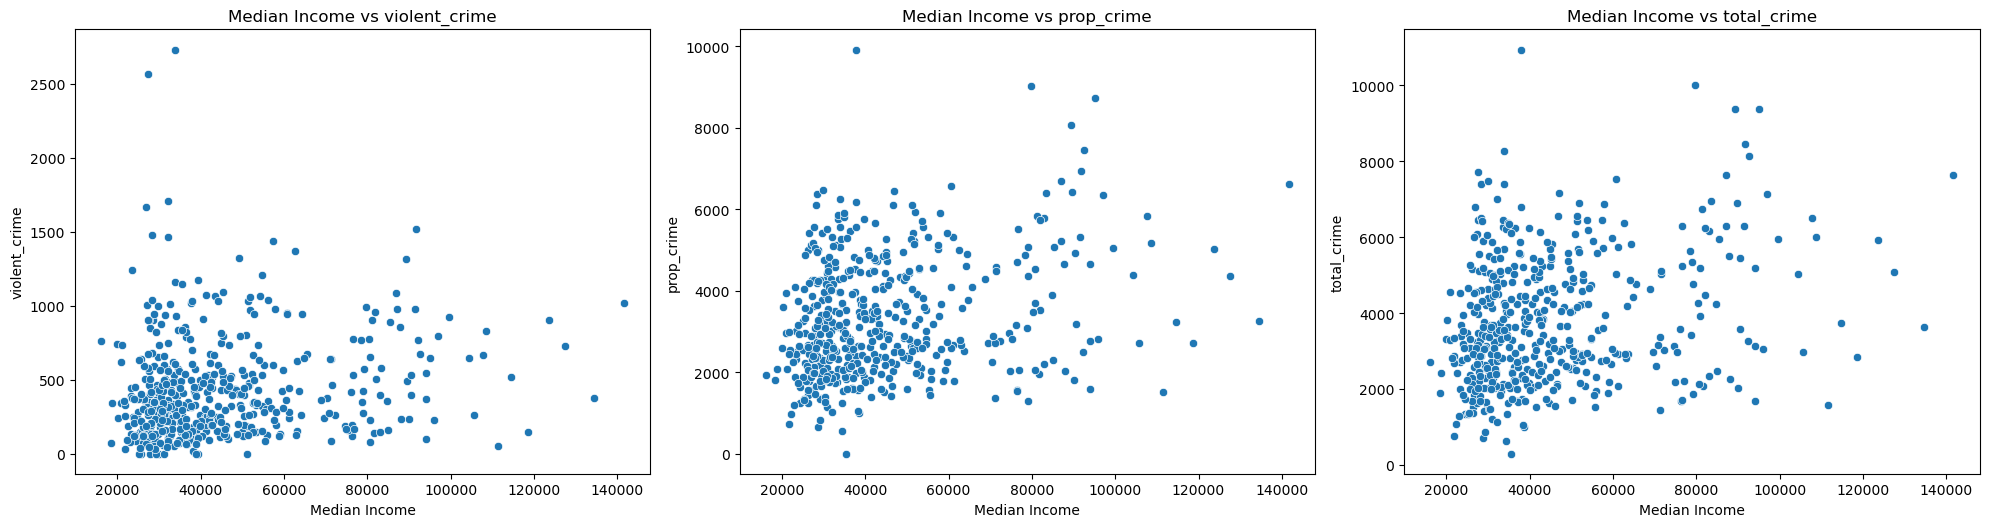

{'Median Income': {'Normality p-value': 1.6708090128452369e-21, 'Number of Outliers': 31}, 'violent_crime': {'Normality p-value': 8.027793499382102e-21, 'Number of Outliers': 15}, 'prop_crime': {'Normality p-value': 1.0940041927920419e-10, 'Number of Outliers': 4}, 'total_crime': {'Normality p-value': 2.1338693312333845e-10, 'Number of Outliers': 4}}


In [225]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

df = merged_data.copy()

variables = ['Median Income','violent_crime', 'prop_crime', 'total_crime']

# Checking for continuous scale - All selected variables are continuous
continuous_check = all(df[var].dtype in ['float64', 'int64'] for var in variables)
print(f'all variables are continuous: {continuous_check}')

# Checking for linear relationship using scatter plot for Median Income against all crime variables
plt.figure(figsize=(20, 15))
for i, var in enumerate(variables[1:], 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df['Median Income'], y=df[var])
    plt.title(f'Median Income vs {var}')

plt.tight_layout()
plt.show()

# Checking for outliers and normality
outliers_and_normality = {}
for var in variables:
    # Calculate Q1, Q3, and IQR
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter outliers and store in dictionary
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    outliers_count = outliers.shape[0]
    
    # Normality test
    stat, p_value = shapiro(df[var].dropna())
    
    # Save results
    outliers_and_normality[var] = {
        'Normality p-value': p_value,
        'Number of Outliers': outliers_count
    }

print(outliers_and_normality)


Based on the normality test results and the scatter plots, our data does not appear to pass all the necessary assumptions for performing Pearson correlation:

- Linear Relationship: The scatter plots do not show clear linear relationships between 'Median Income' and the various crime statistics. Most relationships appear non-linear or show a pattern of clustering, which might suggest heteroscedasticity or non-linear relationships.

- Normality: The Shapiro-Wilk test results for normality are extremely low (close to zero), with significant p-values (all effectively zero). This strongly suggests that none of the variables are normally distributed, which is a critical assumption for the validity of Pearson's correlation.

- No Outliers: The scatter plots clearly show the presence of outliers in all crime variables relative to Median Income, which can skew the results of a Pearson correlation.

- Continuous Scale: This assumption is met since both income and crime rates are measured on a continuous scale.

Given these findings, Pearson correlation may not be the most suitable method for analyzing the relationship between median income and crime statistics in our dataset. Instead, Spearman's rank correlation, a non-parametric test, would be more appropriate as it does not require the assumption of normality and is less sensitive to outliers and non-linear relationships.

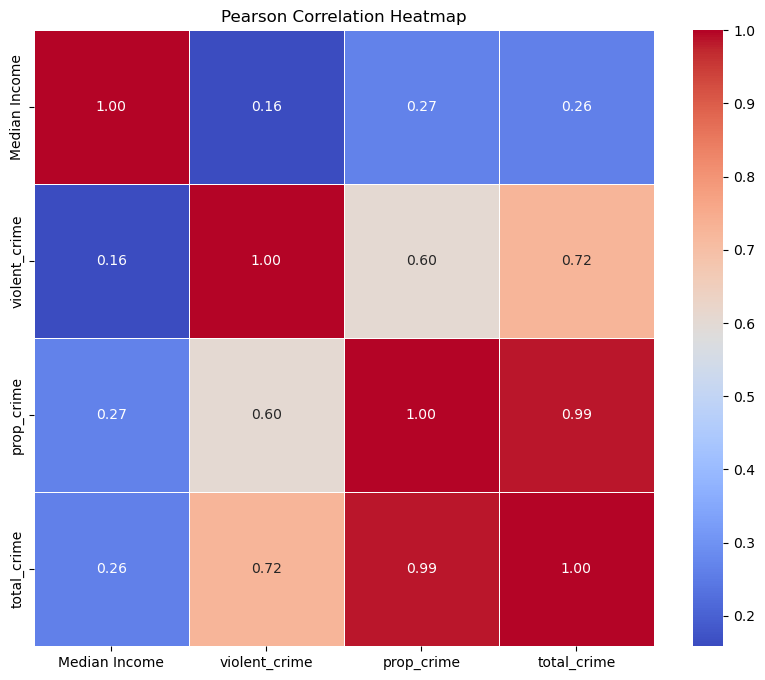

In [224]:
# Perform Pearson Correlation
correlation_matrix = df[variables].corr(method='pearson')

# Draw Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [192]:
from scipy.stats import pearsonr

# Calculate Pearson correlation between 'Median Income' and all crime-related variables
pearson_results = {variable: pearsonr(df['Median Income'], df[variable])[0] for variable in variables if variable != 'Median Income'}

pearson_results


{'violent_crime': 0.15844766441739735,
 'prop_crime': 0.26625883053143395,
 'total_crime': 0.2623067857186559}

The results suggest that there are weak to moderate positive correlations between Median Income and crime rates (violent_crime, prop_crime, and total_crime). However, these correlations are not strong, and the positive direction is somewhat unexpected. Further analysis is needed to explore potential confounding variables, non-linear relationships, or data limitations.



### 2. Spearman Correlation

There are four assumptions to check before performing a Spearman correlation test:
1. The two variables should be measured on an ordinal, interval or ratio scale.
2. The two variables represent paired observations. 
3. There is a monotonic relationship between the two variables.

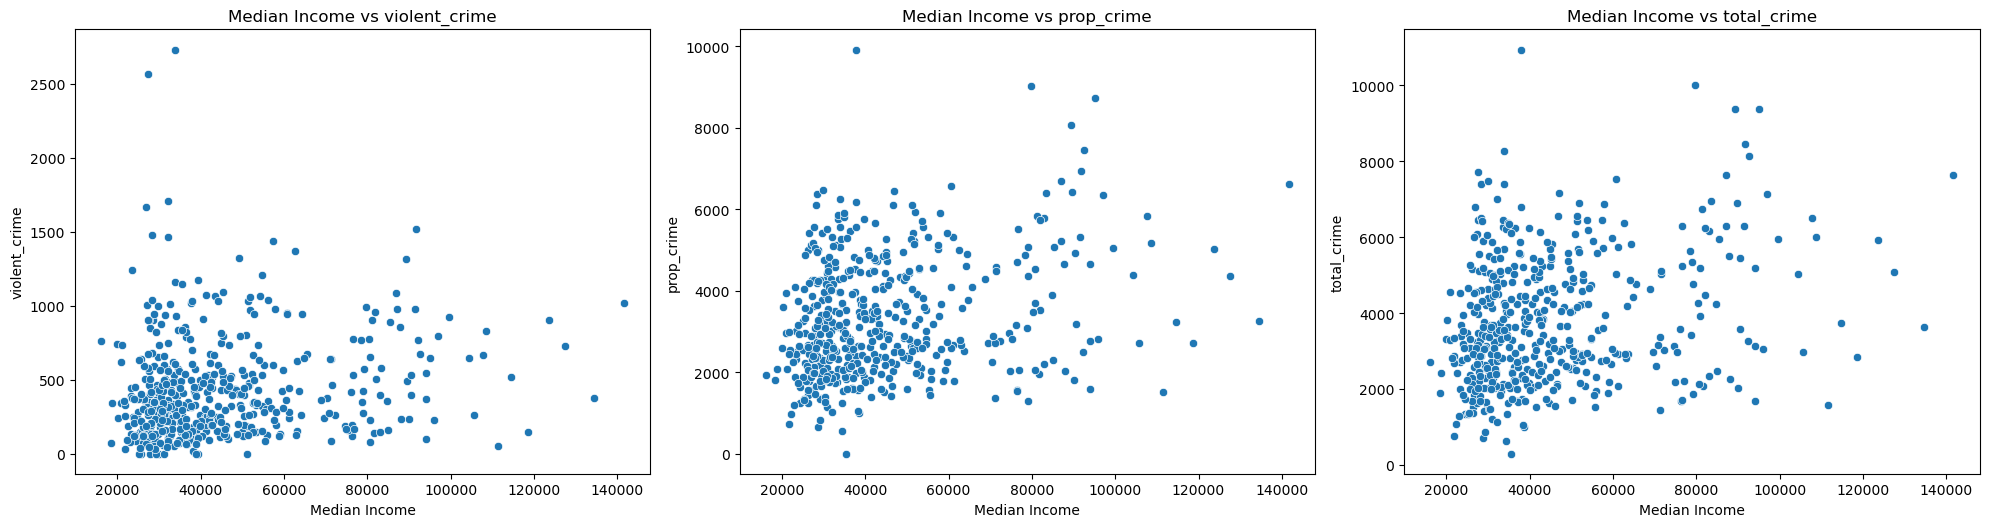

In [193]:
# Plotting scatter plots to visually inspect monotonic relationships
plt.figure(figsize=(20, 15))
for i, var in enumerate(variables[1:]):  # Skip 'Median Income' for x-axis
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=df['Median Income'], y=df[var])
    plt.title(f'Median Income vs {var}')

plt.tight_layout()
plt.show()


- Median Income is measured on a ratio scale as it represents quantifiable amounts with a true zero point.
Crime variables are also on a ratio scale since they represent counts or rates, which are quantifiable and have a true zero point.
- The dataset represents paired observations as each crime statistic is directly paired with a median income for the same city. This means that for each city, both the income level and crime rates are measured, maintaining the pairing requirement.
- From the scatter plots, it appears that the relationships between median income and different crime rates do not consistently show a clear monotonic pattern (either increasing or decreasing). Some crime types show a scattered and non-directional relationship with median income, suggesting a lack of a strong monotonic relationship.

While Assumptions #1 and #2 are satisfied (ordinal, interval or ratio scale data and paired observations), Assumption #3 (monotonic relationship) does not appear to be consistently met across all crime types. This suggests that Spearman correlation might not be the most appropriate method for some of the crime variables relative to median income, especially where the scatter plots show non-monotonic trends. However, Spearman correlation could still be used for an initial exploratory analysis to understand the general direction and strength of relationships, particularly for crime types that might exhibit some level of monotonic trends.

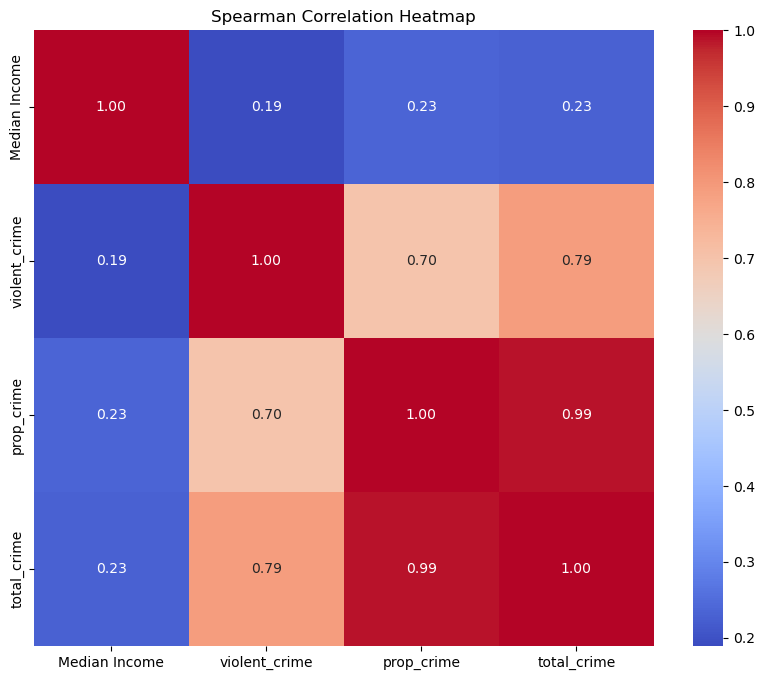

In [194]:
# Calculating Spearman correlation matrix
spearman_corr = df[variables].corr(method='spearman')

# Displaying the Spearman correlation coefficients
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()


In [195]:
from scipy.stats import spearmanr

# Calculate Spearman correlation between 'Median Income' and all crime-related variables
spearman_results = {variable: spearmanr(df['Median Income'], df[variable]).correlation for variable in variables if variable != 'Median Income'}

spearman_results


{'violent_crime': 0.18894595290273952,
 'prop_crime': 0.23383522239181956,
 'total_crime': 0.2287644822081922}

While our results showed some level of positive correlation between median income and crime rates, these relationships are weak, suggesting that median income alone is not a strong predictor of crime rates. These interpretations are consistent with the analytical methods used and are presented clearly to ensure understanding and relevance to our research questions.

### 3. Linear Regression

There are five assumptions assumptions necessary for linear regression:
1. **Independence**:$\epsilon_1, \epsilon_2, \dots, \epsilon_n \quad \text{are independent}$
2. **Identical / homoscedasticity:** $\text{The errors have constant variance, i.e.,} \quad \text{Var}(\epsilon_i) = \sigma^2 \quad \text{for all }i.$
3. **Normally distributed:** $\epsilon_i \sim N(0, \sigma^2)$

4. **Linearity:** The relationship between the independent variables and the response is linear

5. **Completeness:** All the variables which influence the response $y$ are included in the covariates.(This assumption can be handled by considering regression models with random slope and/or random intercept)


We will fit the linear regression models and check for assumptions for each of the three dependent variable.

First, fit a linear regression model using statsmodels or scikit-learn. Here, I’ll use statsmodels because it provides detailed diagnostic information.

In [196]:
import statsmodels.api as sm

# Define the independent variable (x) and add a constant
X = df['Median Income']  # Independent variable
X = sm.add_constant(X)   # Add a constant (intercept) to the model

# Define the dependent variables
dependent_vars = ['violent_crime', 'prop_crime', 'total_crime']

# Fit the models and store them in a dictionary
models = {}
for var in dependent_vars:
    y = df[var]  # Dependent variable
    model = sm.OLS(y, X).fit()  # Fit the model
    models[var] = model  # Store the model
    print(f"Model Summary for {var}:")
    print(model.summary())
    print("\n" + "="*50 + "\n")

Model Summary for violent_crime:
                            OLS Regression Results                            
Dep. Variable:          violent_crime   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     12.39
Date:                Sat, 15 Mar 2025   Prob (F-statistic):           0.000473
Time:                        01:56:59   Log-Likelihood:                -3497.1
No. Observations:                 483   AIC:                             6998.
Df Residuals:                     481   BIC:                             7007.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const        

1. Linearity
Check: Plot the residuals against the fitted values.

Interpretation: If the residuals are randomly scattered around 0, the linearity assumption is satisfied.

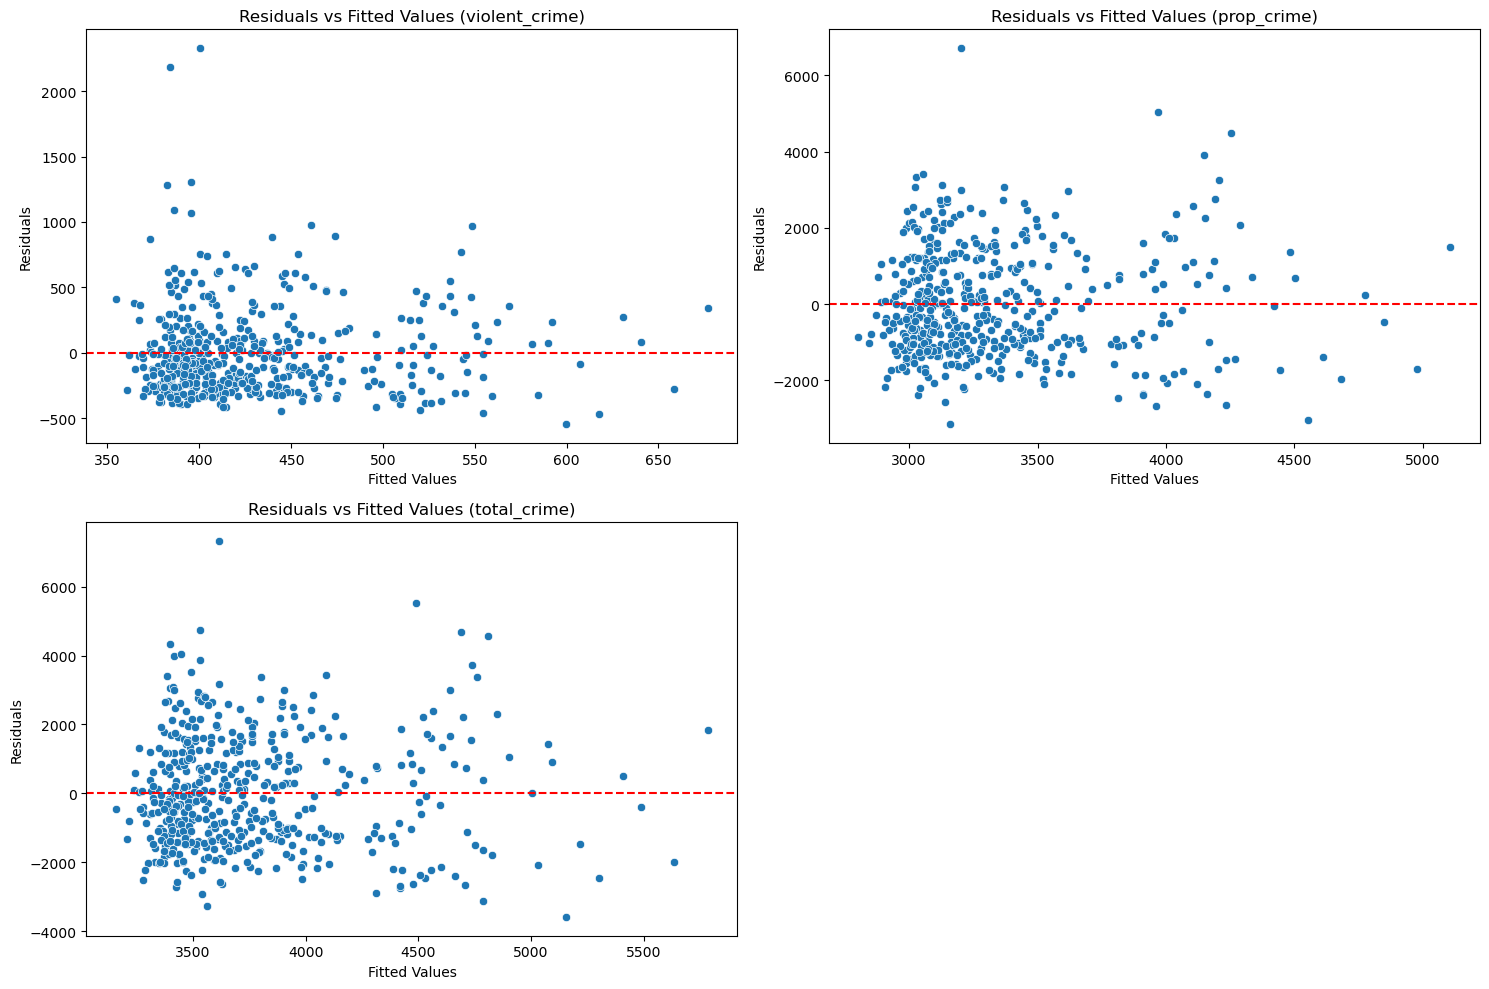

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot residuals vs fitted values for each model
plt.figure(figsize=(15, 10))
for i, (var, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=model.fittedvalues, y=model.resid)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Fitted Values ({var})')
plt.tight_layout()
plt.show()

For all crime variables, the residuals are randomly scattered around 0, showing pattens of clustering and spread.

2. Normality of Residuals
Check: Use a histogram, QQ-plot, and Shapiro-Wilk test.

Interpretation: If the residuals are normally distributed, the histogram should be symmetric, the QQ-plot points should lie on the 45-degree line, and the Shapiro-Wilk test p-value should be greater than 0.05.

/Users/wangzhuoran/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wangzhuoran/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wangzhuoran/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Shapiro-Wilk Test for violent_crime: p-value = 5.3689013918935224e-21
Shapiro-Wilk Test for prop_crime: p-value = 2.102802021397565e-08
Shapiro-Wilk Test for total_crime: p-value = 3.981190133117707e-08


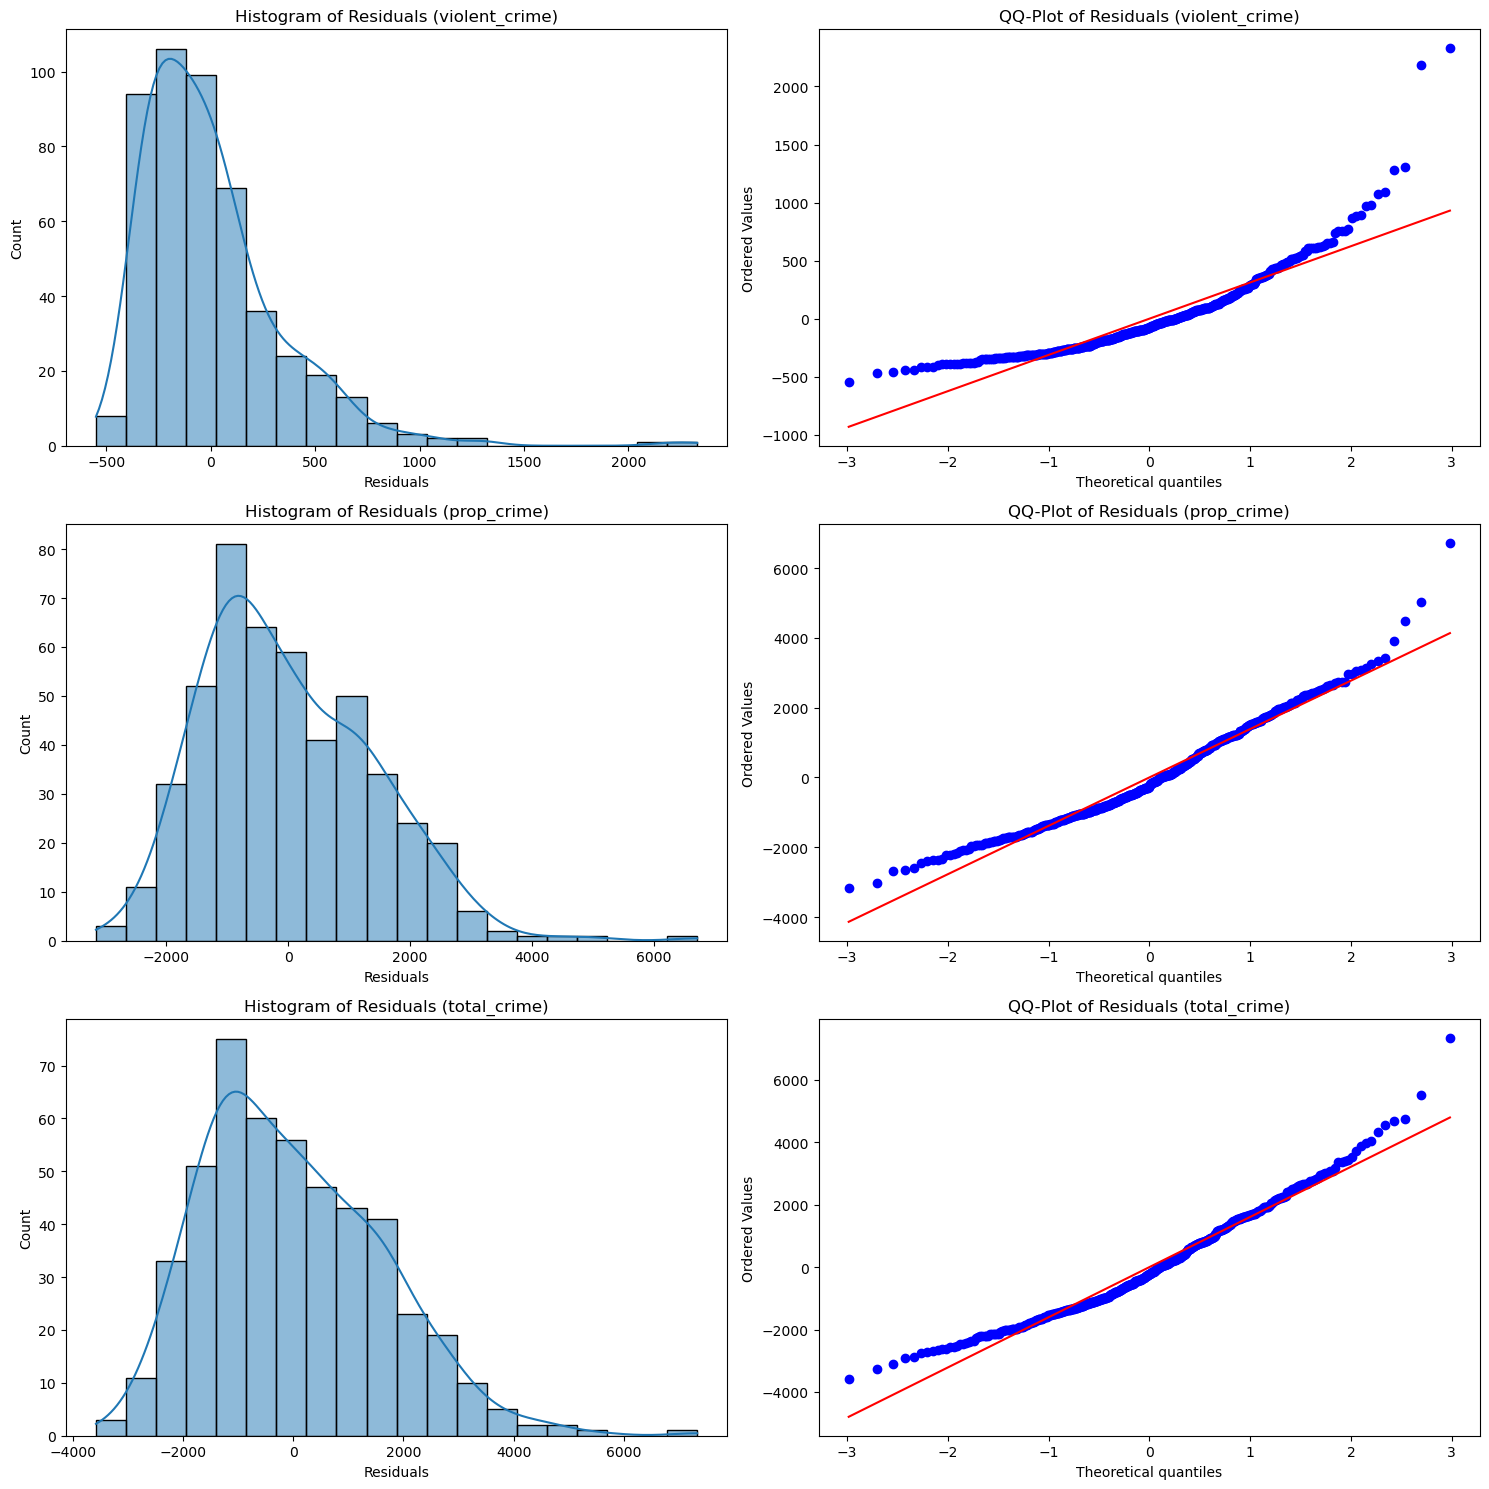

In [198]:
# Check normality for each model
plt.figure(figsize=(15, 15))  # Adjusted figure size
for i, (var, model) in enumerate(models.items(), 1):
    residuals = model.resid
    
    # Histogram
    plt.subplot(3, 2, 2 * i - 1)  # Adjusted subplot index
    sns.histplot(residuals, bins=20, kde=True)
    plt.xlabel('Residuals')
    plt.title(f'Histogram of Residuals ({var})')
    
    # QQ-plot
    plt.subplot(3, 2, 2 * i)  # Adjusted subplot index
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f'QQ-Plot of Residuals ({var})')
    
    # Shapiro-Wilk test
    shapiro_test = shapiro(residuals)
    print(f"Shapiro-Wilk Test for {var}: p-value = {shapiro_test[1]}")
plt.tight_layout()
plt.show()

a. Histograms of Residuals

- Violent Crime: The histogram shows a right-skewed distribution, suggesting that the residuals are not symmetrically distributed around zero.
- Property Crime: This histogram also exhibits a right skew, indicating a deviation from normality.
- Total Crime: Similarly, this histogram is right-skewed, reinforcing the trend observed in the other crime categories.

b. Q-Q Plots
- Violent Crime: The Q-Q plot deviates significantly from the line at both tails, indicating that the residuals have heavier tails than expected under a normal distribution.
- Property Crime: The Q-Q plot also indicates deviations at the tails, suggesting that the residuals are not normally distributed.
- Total Crime: The Q-Q plot also indicates deviations at the tails, similar to the other two types of crime, suggesting non-normality.

c. Shapiro-Wilk Test Results
- Violent Crime: The p-value is extremely small (5.37e-21), strongly suggesting that the residuals are not normally distributed.
- Property Crime: With a p-value of 2.10e-08, this also strongly rejects the null hypothesis of normality.
- Total Crime: The p-value of 3.98e-08 similarly rejects the hypothesis of normal distribution.

The histograms and Q-Q plots visually confirm that the residuals from our models do not follow a normal distribution, which is statistically corroborated by the very low p-values from the Shapiro-Wilk tests for all three crime categories. This deviation from normality could be due to outliers, skewness in the underlying data, or other factors that might be influencing the crime rates.

3. Homoscedasticity (Constant Variance of Residuals)
Check: Plot the residuals against the fitted values (same as linearity check) or against the independent variable (Median Income).

Interpretation: If the residuals are evenly spread across all levels of the independent variable, the homoscedasticity assumption is satisfied.

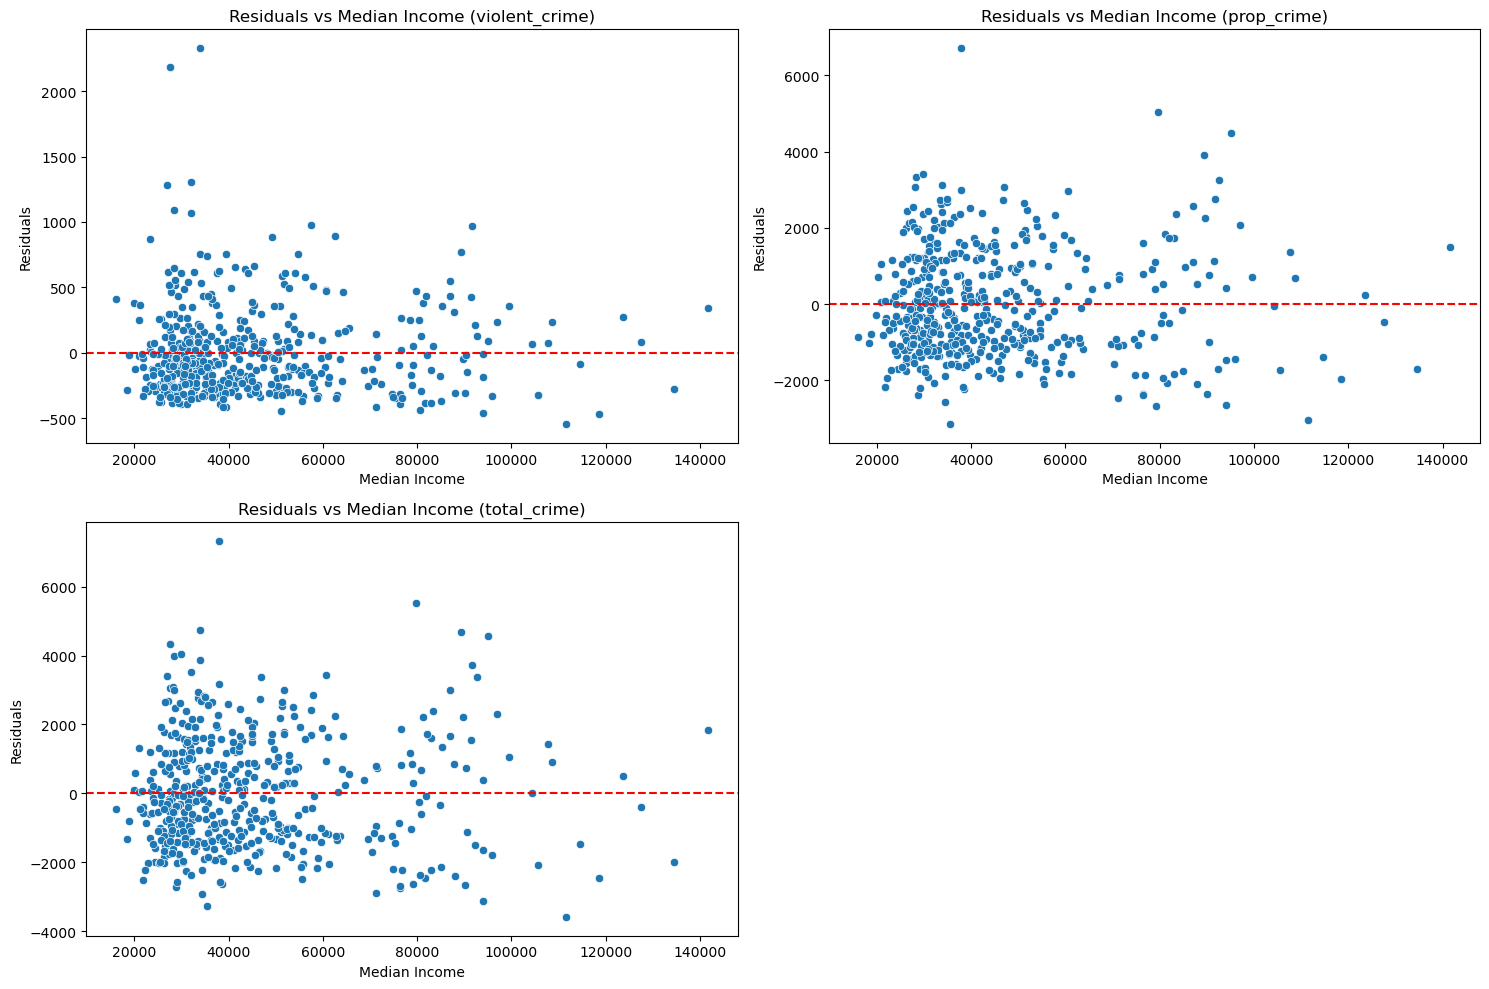

In [199]:
# Plot residuals vs independent variable for each model
plt.figure(figsize=(15, 10))
for i, (var, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df['Median Income'], y=model.resid)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Median Income')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Median Income ({var})')
plt.tight_layout()
plt.show()

- Violent Crime:
The plot shows a relatively consistent spread of residuals across different levels of Median Income, although there might be a slight increase in variance at higher Median Incomes. This slight increase could suggest mild heteroscedasticity.
- Property Crime:
The residuals appear more scattered and show a more pronounced increase in variance as Median Income increases. This pattern suggests heteroscedasticity, where the variance of residuals increases with the Median Income.
- Total Crime:
This plot also indicates potential heteroscedasticity, with residuals appearing more dispersed as Median Income increases. The variance of residuals is notably higher at the upper range of Median Income.

4. Independence of Residuals
Check: Plot the autocorrelation function (ACF) of the residuals.

Interpretation: If there is no significant autocorrelation at any lag, the independence assumption is satisfied.

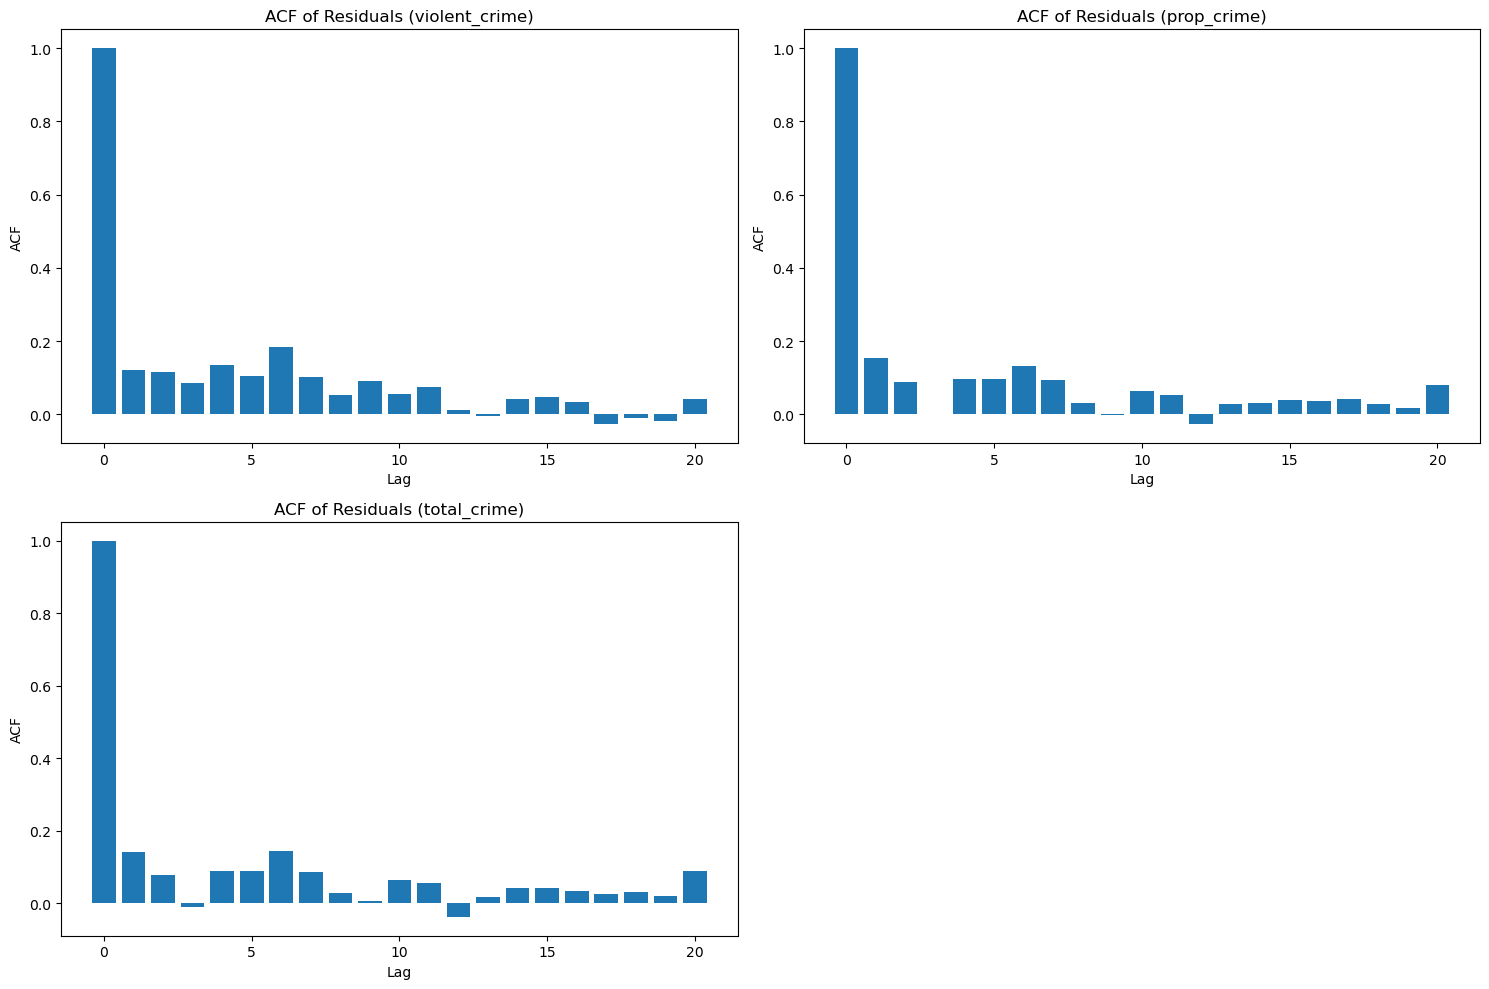

In [200]:
from statsmodels.tsa.stattools import acf

# Plot ACF of residuals for each model
plt.figure(figsize=(15, 10))
for i, (var, model) in enumerate(models.items(), 1):
    residuals = model.resid
    residuals_acf = acf(residuals, nlags=20)
    
    plt.subplot(2, 2, i)
    plt.bar(range(len(residuals_acf)), residuals_acf)
    plt.xlabel('Lag')
    plt.ylabel('ACF')
    plt.title(f'ACF of Residuals ({var})')
plt.tight_layout()
plt.show()

Based on the ACF plots, it appears that the residuals for each of the models (violent crime, property crime, and total crime) do not exhibit problematic autocorrelation. This indicates that the residuals are independent from one another, which means our regression models satisfy the independence assumption.

5. Completeness Check

For the variale besides median income that can affect crime rate are state and population, so we examine the corelation of those varibale with crime rate to check for completeness assumption.

In [201]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Convert 'State' to categorical if it isn't already
df['State'] = df['State'].astype('category')

# Get dummies for 'State', mapping True as 1 and False as 0
state_dummies = pd.get_dummies(df['State'], drop_first=True).astype(int)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, state_dummies], axis=1)

# To check for correlations, include 'Population' and the state dummies in analysis
correlation_matrix = df[['population'] + list(state_dummies.columns) + ['violent_crime', 'prop_crime', 'total_crime']].corr()

# Display the correlation matrix
correlation_matrix


,population,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Idaho,...,Tennessee,Texas,Utah,Virginia,Washington,Wisconsin,Wyoming,violent_crime,prop_crime,total_crime
population,1.000000,0.101776,-0.046800,0.012089,-0.045007,0.008612,-0.033100,0.000063,-0.026306,-0.077237,...,-0.005020,0.029614,-0.041449,0.147902,-0.023816,-0.018938,-0.043768,0.184655,0.229193,0.235594
Arizona,0.101776,1.000000,-0.020168,-0.097743,-0.029775,-0.021583,-0.007575,-0.049975,-0.020168,-0.015198,...,-0.018653,-0.054604,-0.024182,-0.022917,-0.032721,-0.021583,-0.007575,-0.079512,-0.005267,-0.020701
Arkansas,-0.046800,-0.020168,1.000000,-0.071270,-0.021710,-0.015738,-0.005524,-0.036440,-0.014706,-0.011082,...,-0.013601,-0.039815,-0.017633,-0.016710,-0.023859,-0.015738,-0.005524,0.064385,0.123426,0.119753
California,0.012089,-0.097743,-0.071270,1.000000,-0.105217,-0.076271,-0.026769,-0.176600,-0.071270,-0.053706,...,-0.065914,-0.192961,-0.085454,-0.080983,-0.115631,-0.076271,-0.026769,-0.137155,-0.254242,-0.247596
Colorado,-0.045007,-0.029775,-0.021710,-0.105217,1.000000,-0.023234,-0.008155,-0.053796,-0.021710,-0.016360,...,-0.020079,-0.058780,-0.026031,-0.024669,-0.035223,-0.023234,-0.008155,-0.073985,-0.040041,-0.049633
Connecticut,0.008612,-0.021583,-0.015738,-0.076271,-0.023234,1.000000,-0.005911,-0.038997,-0.015738,-0.011859,...,-0.014555,-0.042609,-0.018870,-0.017883,-0.025533,-0.016842,-0.005911,0.094615,-0.002264,0.017259
Delaware,-0.033100,-0.007575,-0.005524,-0.026769,-0.008155,-0.005911,1.000000,-0.013687,-0.005524,-0.004162,...,-0.005108,-0.014955,-0.006623,-0.006276,-0.008962,-0.005911,-0.002075,0.169880,0.061721,0.087847
Florida,0.000063,-0.049975,-0.036440,-0.176600,-0.053796,-0.038997,-0.013687,1.000000,-0.036440,-0.027459,...,-0.033701,-0.098658,-0.043692,-0.041406,-0.059120,-0.038997,-0.013687,0.146392,0.163088,0.170688
Georgia,-0.026306,-0.020168,-0.014706,-0.071270,-0.021710,-0.015738,-0.005524,-0.036440,1.000000,-0.011082,...,-0.013601,-0.039815,-0.017633,-0.016710,-0.023859,-0.015738,-0.005524,-0.023983,0.022708,0.014755
Idaho,-0.077237,-0.015198,-0.011082,-0.053706,-0.016360,-0.011859,-0.004162,-0.027459,-0.011082,1.000000,...,-0.010249,-0.030003,-0.013287,-0.012592,-0.017979,-0.011859,-0.004162,-0.057284,-0.058931,-0.062568


In [221]:
correlation_matrix['violent_crime'][:-3].min(), correlation_matrix['violent_crime'][:-3].max(),correlation_matrix['violent_crime'][:-3].abs().mean()

(-0.18245907874280662, 0.1846551325981684, 0.06249791928895838)

In [222]:
correlation_matrix['prop_crime'][:-3].min(),correlation_matrix['prop_crime'][:-3].max(), correlation_matrix['prop_crime'][:-3].abs().mean()

(-0.2542418782706503, 0.22919314760446172, 0.05708079207814029)

In [223]:
correlation_matrix['total_crime'][:-3].min(),correlation_matrix['total_crime'][:-3].max(), correlation_matrix['total_crime'][:-3].abs().mean()

(-0.24759606884521604, 0.23559355742825913, 0.0552743410354472)

There is no high correlation between state and crime rate or between population and crime rate. This suggests that these variables do not significantly contribute additional explanatory power beyond what median income provides. This could mean that median income alone may be a sufficient predictor for the purposes of specific analysis on the correlation between income and crime rates.